In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
from numpy import pi, exp

from scipy import fftpack

import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.special import j1, erf
from scipy.ndimage.filters import gaussian_filter
from scipy.signal import wiener
%matplotlib nbagg

In [3]:
def fft2(M):
    return fftpack.fftshift(fftpack.fft2(M))

def airy(r, z, l, k):
    """Return complex scattering amplitude
    
      Parameters
    -----------
    r : np.array
        radius in observation plane
    z : float
        distance to observation plane
    l : float
        diameter of aperture
    k : float
        wavenumber of light   
    
    See : http://www.photonics.intec.ugent.be/download/ocs130.pdf
    """
    U = (
         exp(-1j * k * z) * exp((-1j * k  * r**2)/ (2.*z)) *
         (k * l**2 / (1j * 8. * z)) *
         2. * j1(k * l * r / (2. * z)) / (k*l*r/(2.*z))
        )
    return U

def get_amp_phase(U):
    return np.abs(U), np.angle(U)

## Parameter definitions
distances in microns

In [4]:
z = 10.e3 # pinhole-sample distance
l = 10.   # pinhole diameter
lam = 1e-3 * 12398/707 /10 # wavelength
k = pi/lam                 # wavenumber

p = 4*np.pi/lam*(30./340000) # one pixel in inverse microns
p

0.6322953434865161

## Compute Airy Pattern at sample 

In [5]:
x = np.linspace(-150., 150., 500./p)
y = np.linspace(-150., 150., 500./p)
X, Y = np.meshgrid(x, y)

R = np.sqrt(X**2 + Y**2)

U = airy(R, z, l, k)

/Users/markdean/anaconda/envs/main/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':
/Users/markdean/anaconda/envs/main/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


## Simulation -- Fourier transform plus anti phase bounary - width .5

<IPython.core.display.Javascript object>


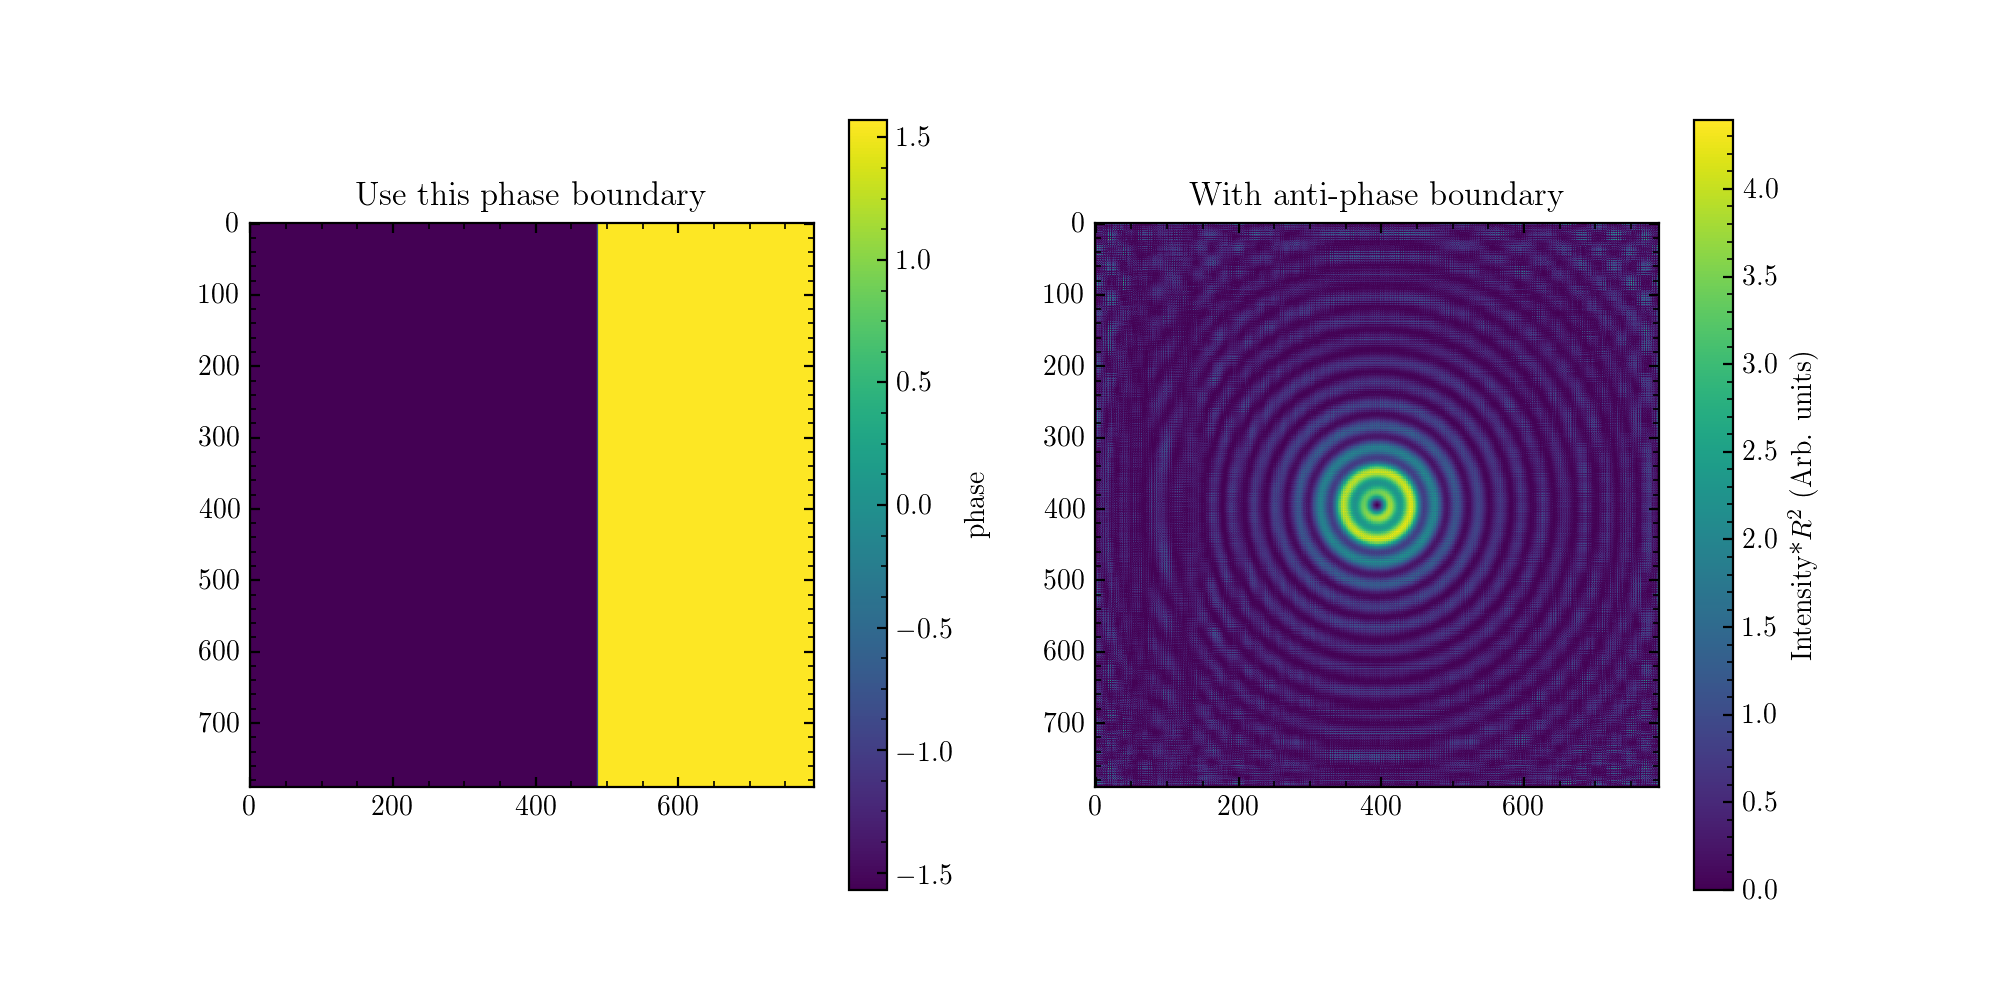

In [6]:
pos = 35
wid = .5

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10,5))

boundary = np.exp(1j*np.pi/2 * erf((X-pos)/wid))

art = ax0.imshow(np.angle(boundary))
cb = plt.colorbar(art, ax=ax0)
cb.set_label('phase')
ax0.set_title("Use this phase boundary")

U_FT = fft2(U*boundary)

art = ax1.imshow(1e-6*np.abs(U_FT)**2 *(X**2+Y**2))
cb = plt.colorbar(art, ax=ax1)
cb.set_label('Intensity*$R^2$ (Arb. units)')
ax1.set_title('With anti-phase boundary')

#D = x.size
#ax1.axis([D//4, 3*D//4, D//4, 3*D//4])#ax1.axis('equal')